In [143]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import sys

%matplotlib inline

plt.style.use(['ggplot'])

## Random data generation

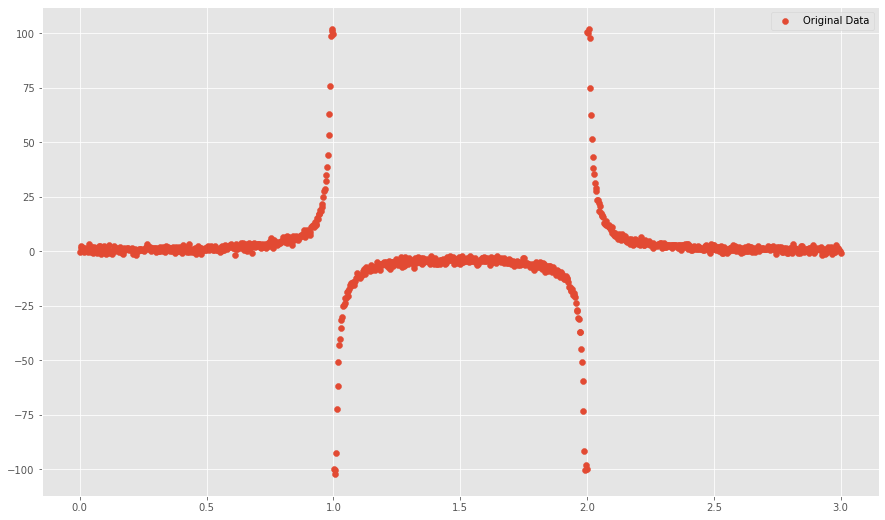

In [144]:
import random
X = np.array([3.0*k/1000.0 for k in range(1001)])
f = lambda x: 1./(x**2-3.*x+2.)
deltas = np.random.normal(0, 1, 1001)
def get_y(i):
    if f(X[i]) < -100:
        return -100 + random.normalvariate(0,1)
    elif -100 <= f(X[i]) <= 100:
         return f(X[i]) + random.normalvariate(0,1)
    else:
         return 100 + random.normalvariate(0,1)
#     if f(X[i])<-100:
#         return -100+deltas[i]
#     if -100<=f(X[i])<=100:
#         return f(X[i])+deltas[i]
#     if f(X[i])>100:
#         return 100+f(X[i])
    
Y = np.array([get_y(i) for i in range(1001)])
figure = plt.figure(figsize=(15,9))
plt.scatter(X, Y, label="Original Data")
plt.savefig('data_mu1.png')
plt.legend()

In [145]:
def F(x, params):
    return (params[0]*x+params[1])/(x**2+params[2]*x+params[3])

def loss(params):
    return sum([(F(X[i], params)-Y[i])**2 for i in range(1001)])

In [146]:
# constants and results definition
x0 = (0, 1, -1, 1)
# x0 = (0, 1, -3, 2)
losses = {}
params = {}
iterations = {}

## Nelder-Mead

In [147]:
import scipy.optimize as opt
result_NM = opt.minimize(loss, x0=x0, method='Nelder-Mead', tol=0.001)
losses['NM'] = result_NM['fun']
params['NM'] = result_NM['x']
iterations['NM'] = result_NM['nit']

In [148]:
result_NM

 final_simplex: (array([[-0.00861409, -0.46041004, -2.94581167,  2.24807458],
       [-0.00861443, -0.46045931, -2.94597447,  2.24832549],
       [-0.00861298, -0.46039929, -2.94551554,  2.24763346],
       [-0.00861168, -0.46045067, -2.94521955,  2.24721361],
       [-0.00861394, -0.460574  , -2.94596423,  2.24832345]]), array([264307.19382044, 264307.19383265, 264307.19384295, 264307.19390019,
       264307.19392443]))
           fun: 264307.1938204359
       message: 'Optimization terminated successfully.'
          nfev: 286
           nit: 163
        status: 0
       success: True
             x: array([-0.00861409, -0.46041004, -2.94581167,  2.24807458])

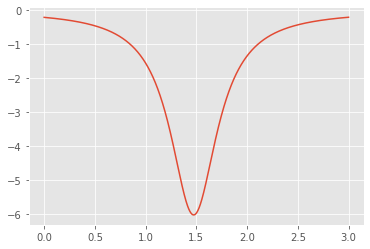

In [149]:
# plt.scatter(X, Y)
plt.plot(X, F(X, result_NM['x']))
plt.savefig('nelder_mead.png')

## Levenberg-Marquardt algorithm

In [150]:
result_LM = opt.least_squares(lambda params, X, Y: F(X, params) - Y, 
                                 x0, 
                                 method='lm',
                                 args=(X,Y))
losses['LM'] = result_LM['cost']
params['LM'] = result_LM['x']
iterations['LM'] = result_LM['nfev']

In [151]:
result_LM

 active_mask: array([0, 0, 0, 0])
        cost: 68193.48297804999
         fun: array([ 1.46051614, -1.42657502, -0.4537884 , ..., -1.1919343 ,
       -0.71828379,  0.38445916])
        grad: array([-1.77663299e+02, -1.46487949e+02,  9.95412493e+07,  1.42203685e+07])
         jac: array([[ 0.        ,  0.99914674,  0.        , -1.00873045],
       [ 0.0030155 ,  1.00516608, -0.00305358, -1.01785986],
       [ 0.00606744,  1.01123997, -0.0061626 , -1.02709976],
       ...,
       [ 0.75332472,  0.25161146,  0.38163968,  0.12746816],
       [ 0.75181516,  0.25085591,  0.38030265,  0.12689445],
       [ 0.75031125,  0.25010375,  0.37897249,  0.12632416]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 97
        njev: None
  optimality: 99541249.34593362
      status: 3
     success: True
           x: array([-1.00998805,  1.01045407, -2.00083777,  1.00085399])

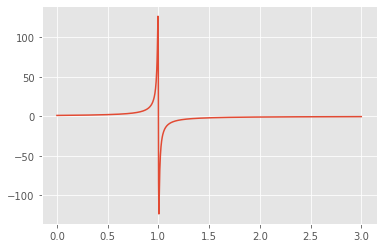

In [152]:
# plt.scatter(X, Y)
plt.plot(X, F(X, result_LM['x']))
plt.savefig('levenberg_marquardt.png')

## Simulated Annealing

In [153]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html
# We have to use bounds here
bounds = list([(-25, 25) for i in range(4)])
bounds

[(-25, 25), (-25, 25), (-25, 25), (-25, 25)]

In [154]:
result_SA = opt.dual_annealing(loss, bounds=bounds, x0=x0)
losses['SA'] = result_SA['fun']
params['SA'] = result_SA['x']
iterations['SA'] = result_SA['nit']

In [168]:
result_SA

     fun: 136382.17372083876
 message: ['Maximum number of iteration reached']
    nfev: 9056
    nhev: 0
     nit: 1000
    njev: 211
  status: 0
 success: True
       x: array([-1.00921716,  1.00970651, -2.00092866,  1.00094488])

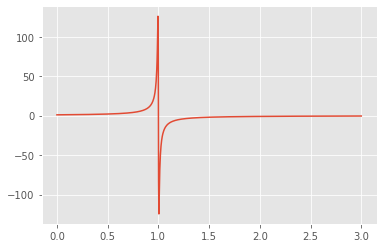

In [155]:
plt.plot(X, F(X, result_SA['x']))
plt.savefig('simulated_annealing.png')

## Differential Evolution

In [156]:
result_DE = opt.differential_evolution(loss, bounds=bounds, x0=x0, tol=0.001)
losses['DE'] = result_DE['fun']
params['DE'] = result_DE['x']
iterations['DE'] = result_DE['nit']

In [167]:
result_DE

     fun: 138365.11290905057
     jac: array([-1132.45042264, -1421.67847071, 35899.78172376, -8039.36859822])
 message: 'Optimization terminated successfully.'
    nfev: 1680
     nit: 8
 success: True
       x: array([ 1.01717269, -2.03407347, -3.99999159,  3.99999989])

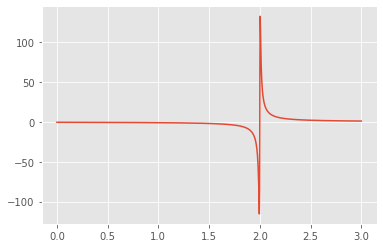

In [157]:
plt.plot(X, F(X, result_DE['x']))
plt.savefig('differential_evolution.png')

In [158]:
params['DE']

array([ 1.01717269, -2.03407347, -3.99999159,  3.99999989])

In [159]:
params

{'NM': array([-0.00861409, -0.46041004, -2.94581167,  2.24807458]),
 'LM': array([-1.00998805,  1.01045407, -2.00083777,  1.00085399]),
 'SA': array([-1.00921716,  1.00970651, -2.00092866,  1.00094488]),
 'DE': array([ 1.01717269, -2.03407347, -3.99999159,  3.99999989])}

In [160]:
iterations

{'NM': 163, 'LM': 97, 'SA': 1000, 'DE': 8}

In [161]:
losses

{'NM': 264307.1938204359,
 'LM': 68193.48297804999,
 'SA': 136382.17372083876,
 'DE': 138365.11290905057}

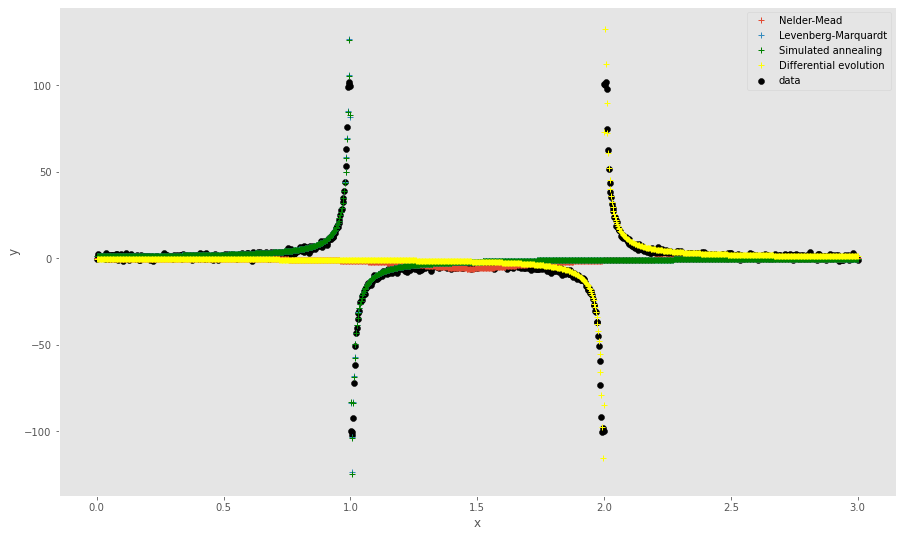

In [170]:
figure = plt.figure(figsize=(15,9))
plt.scatter(X,Y, label='data', color='black')
plt.plot(X, F(X, params['NM']), label='Nelder-Mead', ls='', marker='+')
plt.plot(X, F(X, params['LM']), label='Levenberg-Marquardt', ls='', marker='+')
plt.plot(X, F(X, params['SA']), label='Simulated annealing', ls='', marker='+', color='green')
plt.plot(X, F(X, params['DE']), label='Differential evolution', ls='', marker='+', color='yellow')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# II

Choose at least 15 cities in the world having land transport connections between
them. Calculate the distance matrix for them and then apply the Simulated Annealing
method to solve the corresponding Travelling Salesman Problem. Visualize the
results at the first and the last iteration. If necessary, use the city dataset from
https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

In [216]:
from scipy.spatial import distance
coordinates = np.loadtxt("sgb128_xy.txt", dtype=float)
N = coordinates.shape[0]
distance_matrix = np.empty((N, N))
for i in range(N):
    for j in range(N):
        distance_matrix[i, j] = distance.euclidean(coordinates[i], coordinates[j])
distance_matrix

array([[   0.        , 1163.16273569, 2780.24549697, ..., 2874.36260727,
         330.4472908 ,   40.95082539],
       [1163.16273569,    0.        , 1618.05360866, ..., 1727.12544825,
        1493.21111853, 1122.21232822],
       [2780.24549697, 1618.05360866,    0.        , ...,  459.39727524,
        3110.60402305, 2739.32101122],
       ...,
       [2874.36260727, 1727.12544825,  459.39727524, ...,    0.        ,
        3199.81680365, 2833.72881843],
       [ 330.4472908 , 1493.21111853, 3110.60402305, ..., 3199.81680365,
           0.        ,  371.33228152],
       [  40.95082539, 1122.21232822, 2739.32101122, ..., 2833.72881843,
         371.33228152,    0.        ]])

In [222]:
# Ready-made implementation taken and modified
# https://github.com/chncyhn/simulated-annealing-tsp/blob/master/anneal.py
import math
import random
import matplotlib.pyplot as plt


class SimAnneal(object):
    def __init__(self, distance_matrix, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.distance_matrix = distance_matrix
        self.N = distance_matrix.shape[0]
        self.T = math.sqrt(self.N) if T == -1 else T
        self.T_save = self.T  # save inital T to reset if batch annealing is used
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-9 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)]

        self.first_solution = None
        self.best_solution = None
        self.first_fitness = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        cur_node = random.choice(self.nodes)  # start from a random node
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.distance_matrix[cur_node, x])  # nearest neighbour
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.first_fitness = cur_fit
        self.first_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.distance_matrix[solution[i % self.N], solution[(i + 1) % self.N]]
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Best fitness obtained: ", self.best_fitness)
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Improvement over greedy heuristic: {improvement : .2f}%")

    def batch_anneal(self, times=10):
        """
        Execute simulated annealing algorithm `times` times, with random initial solutions.
        """
        for i in range(1, times + 1):
            print(f"Iteration {i}/{times} -------------------------------")
            self.T = self.T_save
            self.iteration = 1
            self.cur_solution, self.cur_fitness = self.initial_solution()
            self.anneal()

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()
        
        
sa = SimAnneal(distance_matrix, stopping_T=0, stopping_iter=100000)
sa.anneal()


Starting annealing.
Best fitness obtained:  19409.379878130105
Improvement over greedy heuristic:  11.33%


In [223]:
print(sa.best_solution)
print(sa.first_solution)

[113, 8, 57, 82, 56, 19, 35, 108, 16, 84, 52, 53, 76, 40, 41, 32, 72, 50, 38, 29, 31, 94, 95, 13, 112, 86, 44, 100, 62, 80, 114, 96, 121, 123, 43, 92, 93, 88, 87, 98, 89, 90, 85, 59, 110, 125, 18, 101, 54, 78, 33, 17, 2, 28, 68, 39, 74, 10, 124, 6, 34, 22, 70, 1, 71, 48, 99, 14, 75, 73, 42, 104, 77, 65, 103, 67, 24, 117, 102, 107, 122, 20, 60, 4, 115, 21, 105, 69, 109, 46, 83, 47, 27, 116, 55, 23, 36, 81, 111, 106, 3, 66, 25, 45, 11, 79, 58, 126, 9, 97, 26, 7, 37, 15, 61, 0, 127, 91, 49, 64, 120, 51, 30, 12, 5, 118, 63, 119]
[73, 75, 42, 14, 99, 48, 104, 77, 65, 103, 67, 51, 30, 120, 64, 49, 91, 127, 0, 61, 15, 37, 7, 26, 119, 113, 8, 57, 82, 56, 19, 35, 53, 108, 52, 84, 16, 76, 40, 41, 32, 72, 50, 38, 29, 94, 31, 95, 13, 112, 86, 44, 100, 62, 80, 74, 114, 96, 121, 39, 28, 68, 17, 2, 54, 78, 33, 101, 18, 125, 110, 59, 89, 90, 85, 98, 87, 88, 93, 92, 43, 123, 10, 124, 34, 22, 70, 1, 71, 107, 102, 117, 24, 4, 60, 20, 122, 115, 21, 105, 69, 109, 46, 83, 47, 27, 116, 55, 36, 23, 81, 111, 1

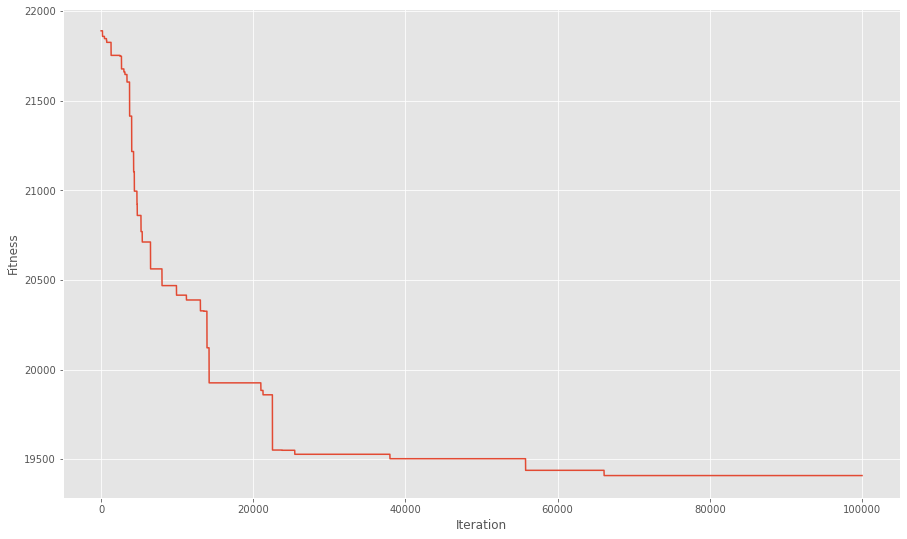

In [224]:
figure = plt.figure(figsize=(15,9))
sa.plot_learning()

In [225]:
coordinates = np.loadtxt("sgb128_xy.txt", dtype=float)

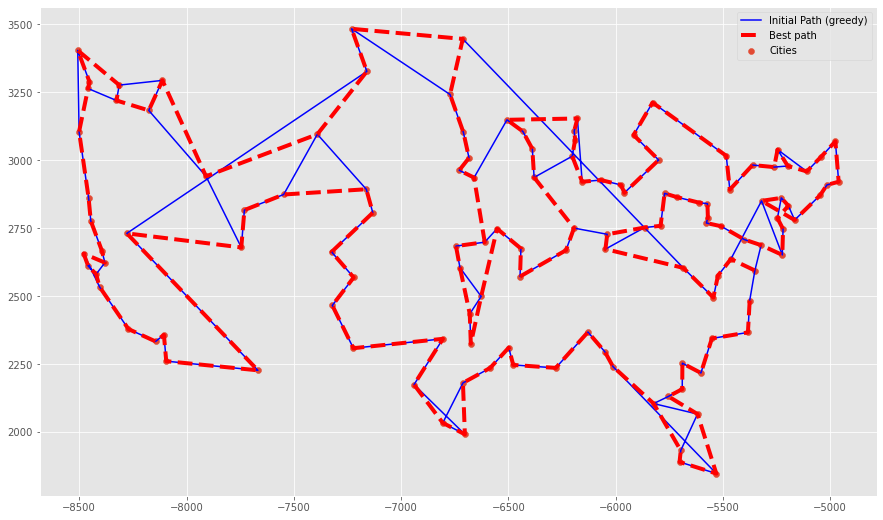

In [235]:
figure = plt.figure(figsize=(15,9))
plt.scatter(coordinates[:, 0], coordinates[:, 1], label = 'Cities')

plt.plot(coordinates[sa.first_solution, 0], coordinates[sa.first_solution, 1], 'b', label = 'Initial Path (greedy)')
plt.plot(coordinates[sa.best_solution, 0], coordinates[sa.best_solution, 1], 'r--', linewidth=4, label = 'Best path')


plt.legend()